In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [6]:
path_original = "../../../data/artifical_signals/artifical_2_signals.csv"
df_original = pd.read_csv(path_original)

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>

In [3]:
for i in range(1, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for: sine_signal
p-value: 0.0
Time series is stationary
----------
Test for: sawtooth_signal
p-value: 1.3713685985256646e-22
Time series is stationary
----------


## Correlation of sensor time series

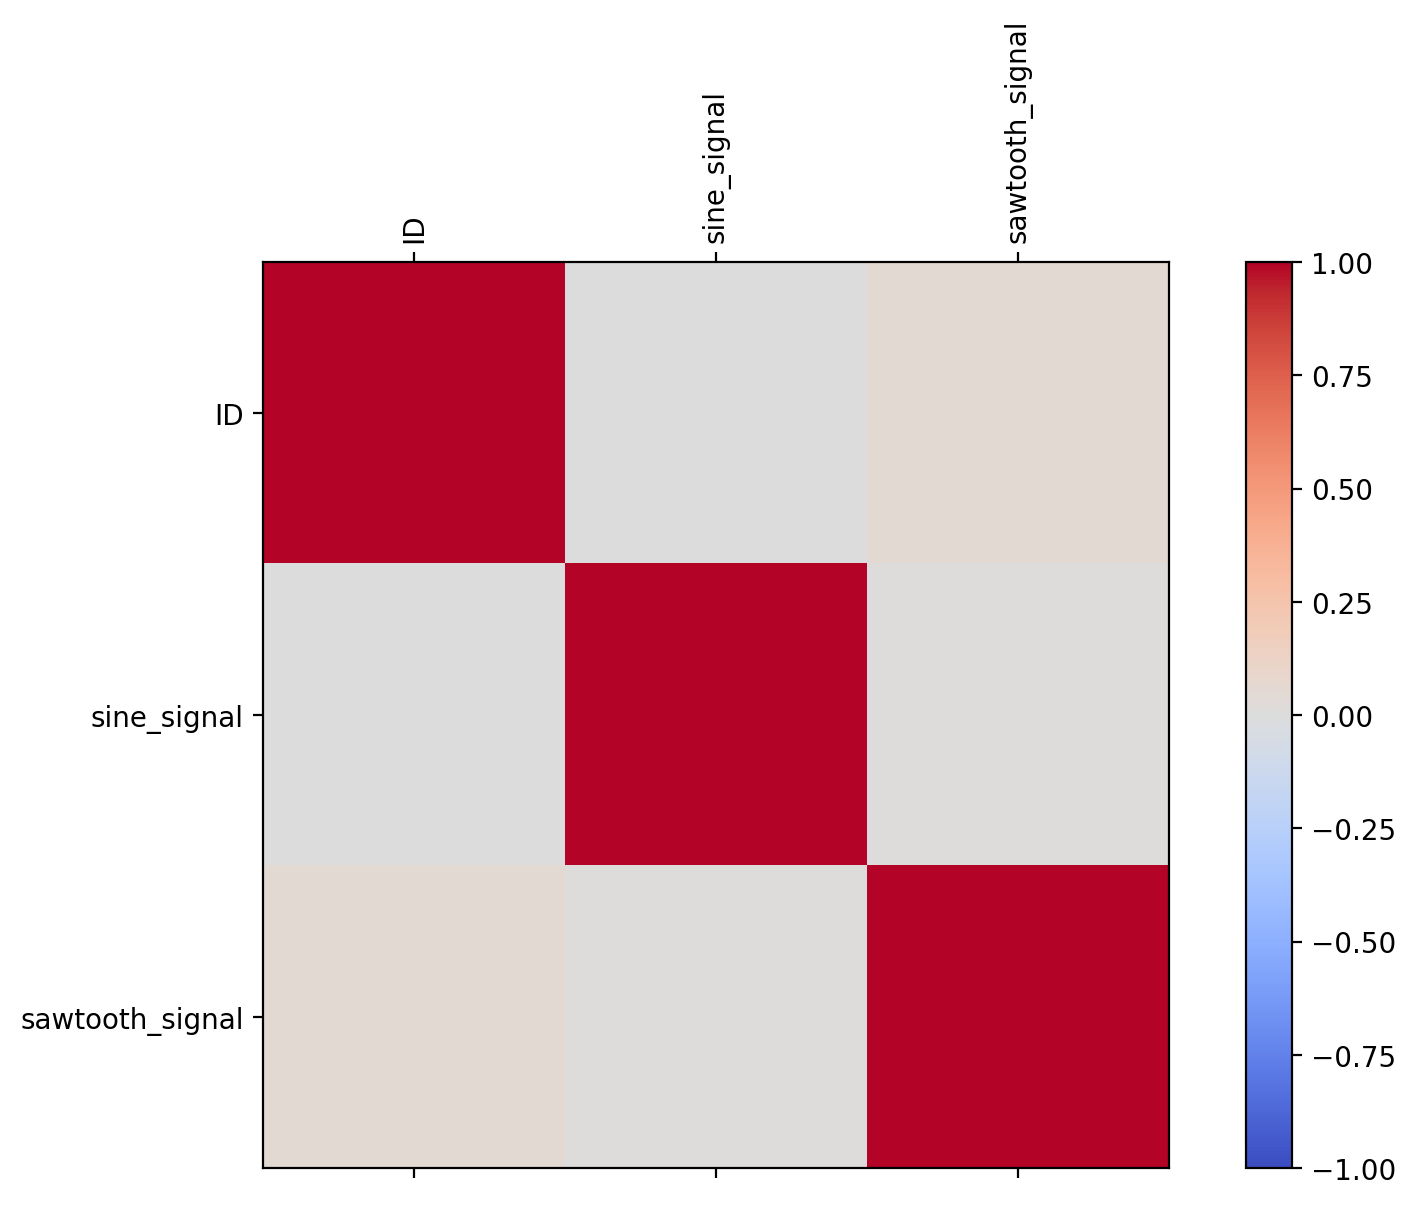

In [8]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,6), dpi=200)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Histogramm 

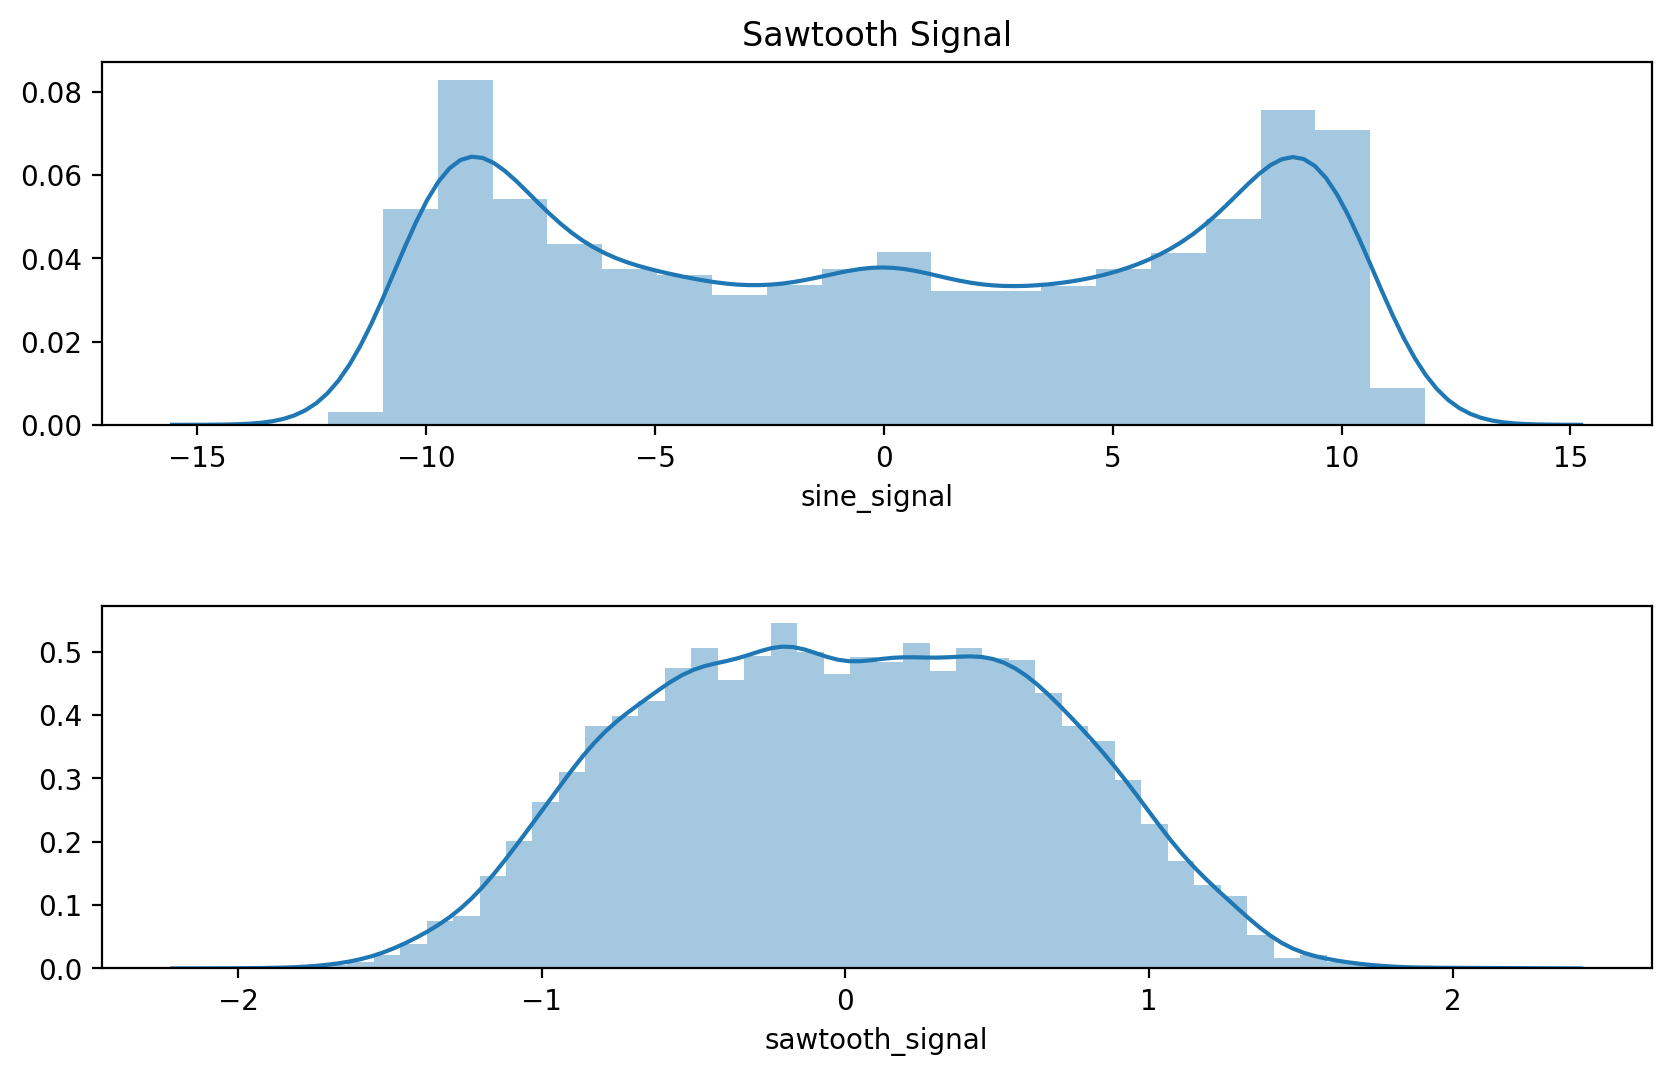

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0, 2):
    sns.distplot(df_original.iloc[:,i+1], ax=ax[i])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax[0].set_title("Sine Signal")
ax[0].set_title("Sawtooth Signal")
plt.show()